# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import yfinance as yf
import pickle

sns.set_style('darkgrid')

In [67]:
# Load the S&P 500 ticker data from the saved pickle files
file_paths = ["saved_tickers.pkl", "ticker_history.pkl"]
data_dict = {}

for path in file_paths:
    with open(path, "rb") as file:
        data = pickle.load(file, encoding='latin1')
        data_dict[path] = data

symbols = data_dict["saved_tickers.pkl"]
ticker_history = data_dict["ticker_history.pkl"]

print(f"Successfully loaded data for {len(symbols)} S&P 500 stocks.")

Successfully loaded data for 496 S&P 500 stocks.


In [68]:
# We will create one master DataFrame with log returns for all stocks.
# We use np.log (natural log), which is the standard for financial returns.
log_returns_df = pd.DataFrame()

for sym in symbols:
    if not ticker_history[sym].empty:
        # Calculate log returns from the 'Close' price
        log_returns_df[sym] = np.log(ticker_history[sym]['Close'] / ticker_history[sym]['Close'].shift(1))

# Drop the first row which will be NaN
log_returns_df.dropna(inplace=True)

print(f"Successfully loaded and processed log returns for {log_returns_df.shape[1]} stocks.")
print("The data has", log_returns_df.shape[0], "trading days of returns.")

/tmp/ipykernel_395990/1245199771.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  log_returns_df[sym] = np.log(ticker_history[sym]['Close'] / ticker_history[sym]['Close'].shift(1))
/tmp/ipykernel_395990/1245199771.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  log_returns_df[sym] = np.log(ticker_history[sym]['Close'] / ticker_history[sym]['Close'].shift(1))
/tmp/ipykernel_395990/1245199771.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

Successfully loaded and processed log returns for 496 stocks.
The data has 1004 trading days of returns.


/tmp/ipykernel_395990/1245199771.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  log_returns_df[sym] = np.log(ticker_history[sym]['Close'] / ticker_history[sym]['Close'].shift(1))
/tmp/ipykernel_395990/1245199771.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  log_returns_df[sym] = np.log(ticker_history[sym]['Close'] / ticker_history[sym]['Close'].shift(1))
/tmp/ipykernel_395990/1245199771.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

### Problem 1 

In [69]:
# We'll use 4 years of data to match the data from your previous project.
spy_data = yf.download('SPY', period='4y')

# Calculate the daily log returns for the SPY index
spy_log_returns = np.log(spy_data['Close'] / spy_data['Close'].shift(1))
spy_log_returns.dropna(inplace=True)

print("SPY log returns calculated.")

[*********************100%***********************]  1 of 1 completed

SPY log returns calculated.


In [70]:
# Perform Rolling Normality Test
# Define the window size for our rolling test (e.g., 90 trading days, approx. 4 months)
window_size = 90

# Define a function that performs the normality test and returns the p-value
def get_p_value(window):
    if len(window) < window_size:
        return None # Not enough data for a test yet
    stat, p_value = stats.normaltest(window)
    return p_value

# Apply this function over a rolling window of our log returns data
rolling_p_values = spy_log_returns.rolling(window=window_size).apply(get_p_value, raw=True)

# Drop initial NaN values where the window was not yet full
rolling_p_values.dropna(inplace=True)

print("Rolling normality test complete.")

Rolling normality test complete.


<Figure size 1400x700 with 0 Axes>

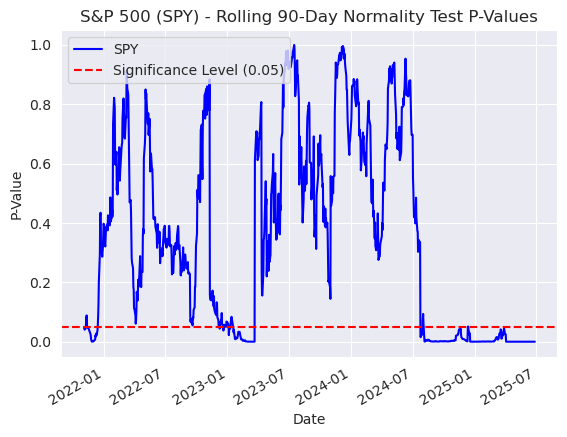


Interpretation:
Periods where the blue line is BELOW the red dashed line (p-value < 0.05) suggest that the log returns were NOT normally distributed.
Periods where the blue line is ABOVE the red line suggest no statistical evidence against normality.


In [71]:
# Plotting the P-values Over Time

plt.figure(figsize=(14, 7))
rolling_p_values.plot(label='P-Value from Rolling 90-Day Normality Test', color='blue')

# Add a horizontal line at the 0.05 significance level
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')

plt.title('S&P 500 (SPY) - Rolling 90-Day Normality Test P-Values')
plt.xlabel('Date')
plt.ylabel('P-Value')
plt.legend()
plt.show()

print("\nInterpretation:")
print("Periods where the blue line is BELOW the red dashed line (p-value < 0.05) suggest that the log returns were NOT normally distributed.")
print("Periods where the blue line is ABOVE the red line suggest no statistical evidence against normality.")

### Problem 2

In [72]:
# Define thresholds (1% tails)
lower_threshold = spy_log_returns.quantile(0.01)
upper_threshold = spy_log_returns.quantile(0.99)

# Filter out extreme values
filtered_returns = spy_log_returns[(spy_log_returns > lower_threshold) & (spy_log_returns < upper_threshold)]

print(f"Original data points: {len(spy_log_returns)}")
print(f"Filtered data points: {len(filtered_returns)}")

Original data points: 1004
Filtered data points: 1004


In [73]:
def get_p_value(window):
    if len(window) < window_size:
        return None
    stat, p_value = stats.normaltest(window)
    return p_value

# Apply rolling test on filtered data
rolling_p_values_filtered = filtered_returns.rolling(window=window_size).apply(get_p_value, raw=True)
rolling_p_values_filtered.dropna(inplace=True)

print("Rolling normality test on filtered data complete.")

Rolling normality test on filtered data complete.


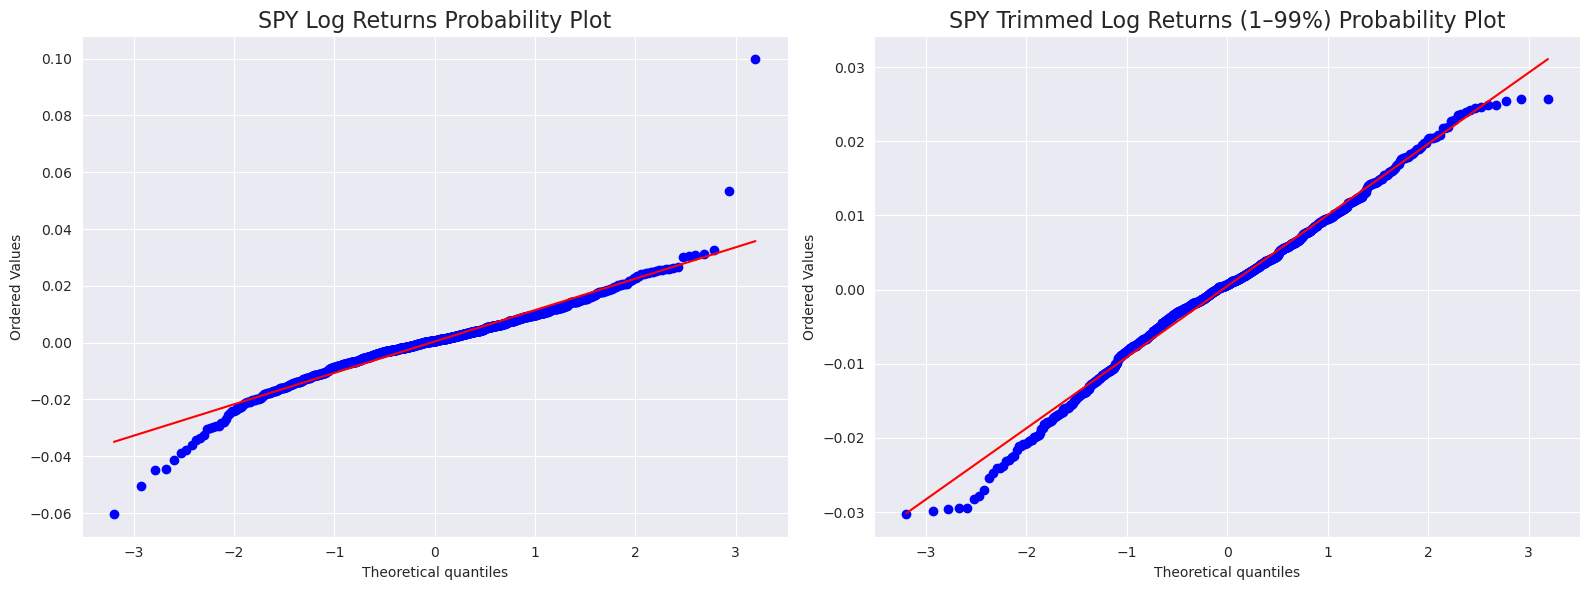

In [74]:
spy_returns_array = spy_log_returns.dropna().values.squeeze()
filtered_returns_array = filtered_returns.dropna().values.squeeze()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

stats.probplot(spy_returns_array, dist="norm", plot=axes[0])
axes[0].set_title("SPY Log Returns Probability Plot", fontsize=16)
axes[0].grid(True)

stats.probplot(filtered_returns_array, dist="norm", plot=axes[1])
axes[1].set_title("SPY Trimmed Log Returns (1–99%) Probability Plot", fontsize=16)
axes[1].grid(True)

plt.tight_layout()
plt.show()

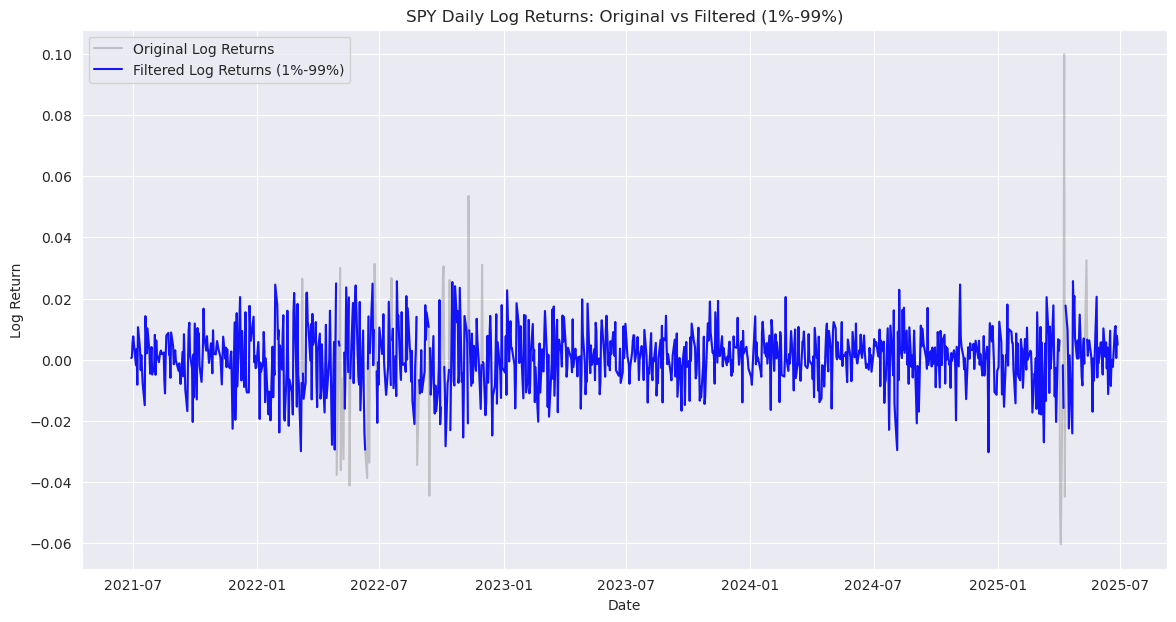

In [75]:
plt.figure(figsize=(14, 7))

# Plot original log returns (faded for contrast)
plt.plot(spy_log_returns.index, spy_log_returns, label='Original Log Returns', alpha=0.4, color='gray')

# Overlay filtered returns (removing top/bottom 1%)
plt.plot(filtered_returns.index, filtered_returns, label='Filtered Log Returns (1%-99%)', alpha=0.9, color='blue')

plt.title("SPY Daily Log Returns: Original vs Filtered (1%-99%)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1400x700 with 0 Axes>

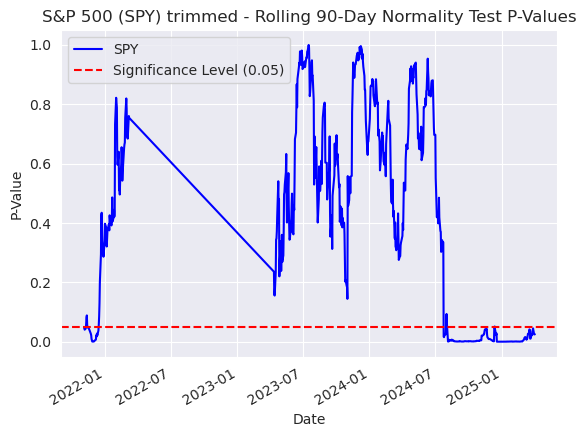


Interpretation:
Periods where the blue line is BELOW the red dashed line (p-value < 0.05) suggest that the log returns were NOT normally distributed.
Periods where the blue line is ABOVE the red line suggest no statistical evidence against normality.


In [76]:
# Plotting the P-values Over Time

plt.figure(figsize=(14, 7))
rolling_p_values_filtered.plot(label='P-Value from Rolling 90-Day Normality Test', color='blue')

# Add a horizontal line at the 0.05 significance level
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')

plt.title('S&P 500 (SPY) trimmed - Rolling 90-Day Normality Test P-Values')
plt.xlabel('Date')
plt.ylabel('P-Value')
plt.legend()
plt.show()

print("\nInterpretation:")
print("Periods where the blue line is BELOW the red dashed line (p-value < 0.05) suggest that the log returns were NOT normally distributed.")
print("Periods where the blue line is ABOVE the red line suggest no statistical evidence against normality.")

### Problem 4

In [87]:
filename = 'portfolio_values.pkl'

with open(filename, 'rb') as file:
    portfolio_values = pickle.load(file)  

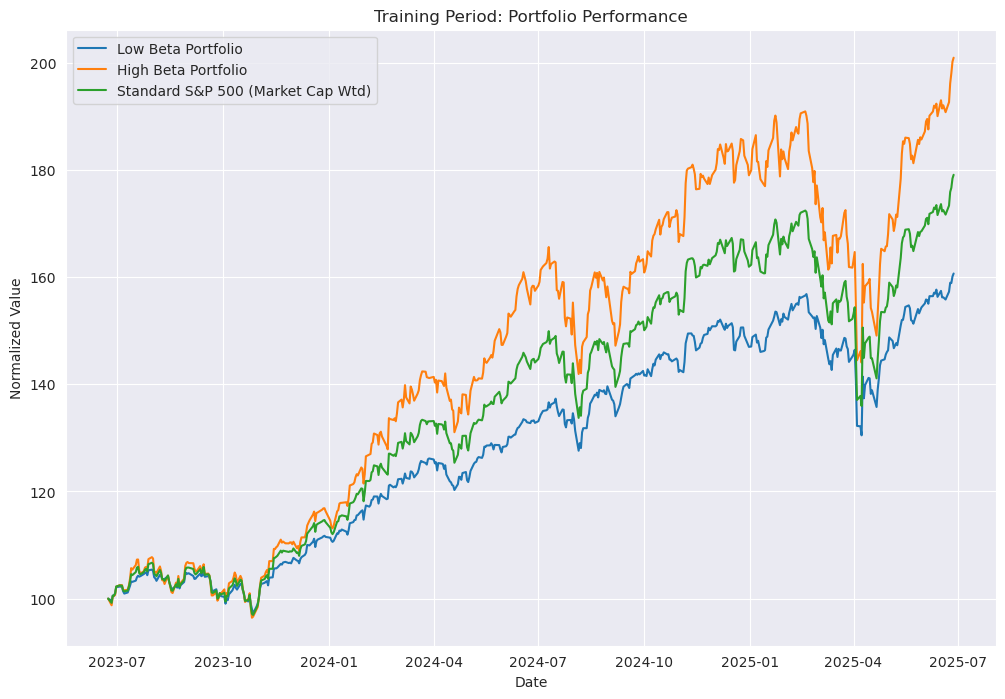

In [88]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(portfolio_values ["Low_Beta"], label="Low Beta Portfolio")
ax.plot(portfolio_values ["High_Beta"], label="High Beta Portfolio")
ax.plot(portfolio_values ["Std"], label="Standard S&P 500 (Market Cap Wtd)")
ax.set_title("Training Period: Portfolio Performance")
ax.set_xlabel("Date")
ax.set_ylabel("Normalized Value")
ax.legend()
plt.show()

In [91]:
# Calculate Log Returns for Each Portfolio
portfolio_log_returns = np.log(portfolio_values / portfolio_values.shift(1))
portfolio_log_returns.dropna(inplace=True)

print("Log returns for each portfolio calculated.")
portfolio_log_returns.head()

Log returns for each portfolio calculated.


,ZTS,ZBH,ZBRA,YUM,XYL,XEL,WYNN,WDAY,WTW,WMB,...,AMD,ADBE,ACN,ABBV,ABT,AOS,MMM,Low_Beta,High_Beta,Std
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26 00:00:00-04:00,-0.004942,-0.008229,0.032676,-0.010155,-0.003248,0.012164,0.010026,-0.010448,-0.003145,0.015570,...,-0.022987,-0.010807,-0.003424,-0.007162,0.004248,0.020792,-0.003082,-0.003911,-0.012546,-0.007916
2023-06-27 00:00:00-04:00,0.018510,0.013908,0.034901,0.000372,0.008458,-0.006704,0.004834,0.019273,0.005593,0.009609,...,0.026436,0.020150,0.011367,-0.017567,-0.006657,0.018434,-0.021645,0.009433,0.017061,0.013382
2023-06-28 00:00:00-04:00,-0.009242,-0.005609,0.002402,0.006532,-0.009633,-0.019405,-0.014381,-0.005635,-0.001632,0.020509,...,-0.001995,-0.014079,0.003021,-0.000679,-0.001671,-0.001939,0.003150,-0.000929,0.000734,0.000424
2023-06-29 00:00:00-04:00,0.016248,0.007954,0.018142,0.015418,0.007211,0.000816,0.002395,0.018486,0.002928,0.015802,...,0.009665,0.002774,0.021671,0.005419,0.000465,0.003460,0.006774,0.004943,0.001503,0.003457
2023-06-30 00:00:00-04:00,0.001976,0.003096,0.024466,0.009354,0.011431,0.014256,0.010566,-0.005430,0.012606,0.003069,...,0.023719,0.010732,0.000811,0.011196,0.012553,0.005511,0.008529,0.011455,0.015153,0.013099


In [94]:
window_size = 90 

def get_p_value(window):
    if len(window) < window_size:
        return None
    _, p_value = stats.normaltest(window)
    return p_value
    
rolling_p_values = portfolio_log_returns.rolling(window=window_size).apply(get_p_value, raw=True)
rolling_p_values.dropna(inplace=True)



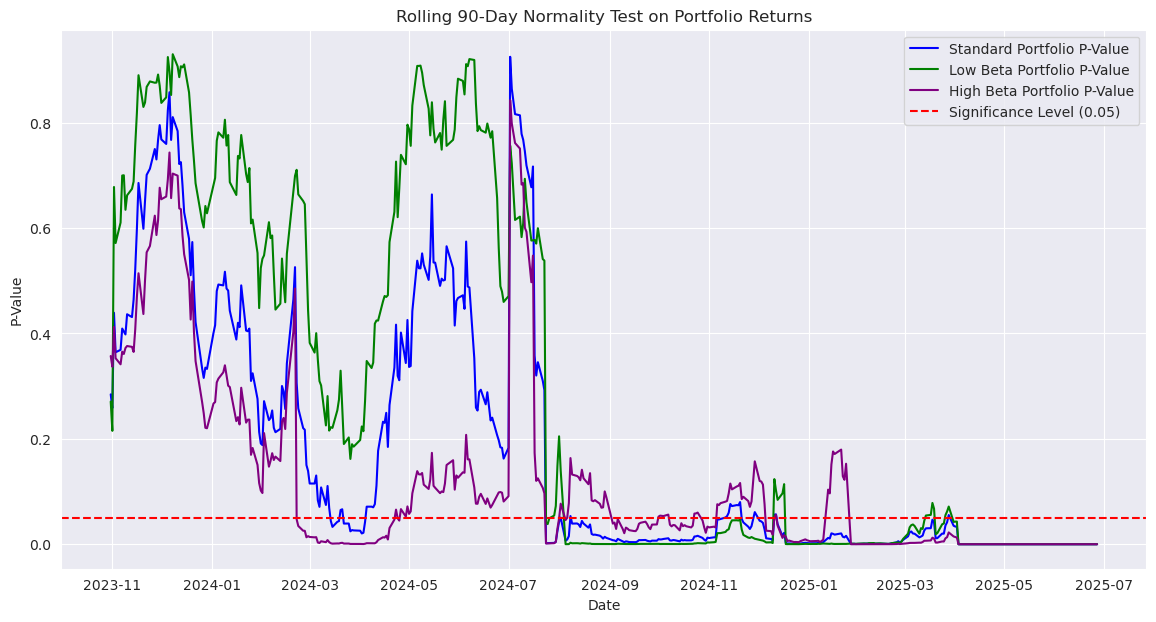

In [96]:
plt.figure(figsize=(14, 7))
plt.plot(rolling_p_values['Std'], label='Standard Portfolio P-Value', color='blue')
plt.plot(rolling_p_values['Low_Beta'], label='Low Beta Portfolio P-Value', color='green')
plt.plot(rolling_p_values['High_Beta'], label='High Beta Portfolio P-Value', color='purple')

plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')

plt.title('Rolling 90-Day Normality Test on Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('P-Value')
plt.legend()
plt.show()
